In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from pydataset import data

# Tidy Data Exercises

## 1.

Attendance Data

- Load the attendance.csv file and calculate an attendnace percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [12]:
# read in the csv file
df = pd.read_csv('~/codeup-data-science/data/untidy-data/attendance.csv')
df.head()

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [13]:
# take a look at starting shape
df.shape

(4, 9)

In [14]:
# rename name column
df.rename(columns={'Unnamed: 0' : 'name'}, inplace=True)
df.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [16]:
# melt the df to get a single observation on each row
df_melted = df.melt(id_vars='name', var_name='date', value_name='status')
df_melted.head()

,name,date,status
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [17]:
# check updated shape
df_melted.shape

(32, 3)

In [19]:
# create a new column that takes the letter in the status column and returns a number representing attendance percentage for that day
# H = half day = 0.5
# P = present = 1
# T = tardy = 0.90
# A = absent = 0

df_melted_replaced = df_melted.replace(to_replace={'H' : 0.5, 'P' : 1, 'T' : 0.9, 'A' : 0})

In [20]:
# check results
df_melted_replaced.head()

,name,date,status
0,Sally,2018-01-01,1.0
1,Jane,2018-01-01,0.0
2,Billy,2018-01-01,0.0
3,John,2018-01-01,1.0
4,Sally,2018-01-02,0.9


In [21]:
# find total attendance percentage using group by and mean
df_melted_replaced.groupby('name').status.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: status, dtype: float64

- You should end up with something like this:

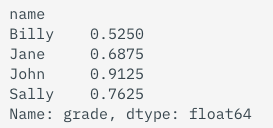

## 2.

Coffee Levels

- Read the coffee_levels.csv file.

In [24]:
# read in the csv file
df = pd.read_csv('~/codeup-data-science/data/untidy-data/coffee_levels.csv')
df.value_counts('coffee_carafe')

coffee_carafe
x    10
y    10
z    10
dtype: int64

In [25]:
df

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291
5,13,x,0.310711
6,14,x,0.507288
7,15,x,0.215043
8,16,x,0.183891
9,17,x,0.391560


- Transform the data so that each carafe is in it's own column.

In [27]:
df_pivot = df.pivot_table(index='hour', columns = 'coffee_carafe', values = 'coffee_amount').reset_index()
df_pivot

coffee_carafe,hour,x,y,z
0,8,0.816164,0.189297,0.999264
1,9,0.451018,0.521502,0.915990
2,10,0.843279,0.023163,0.144928
3,11,0.335533,0.235529,0.311495
4,12,0.898291,0.017009,0.771947
5,13,0.310711,0.997464,0.398520
6,14,0.507288,0.058361,0.864464
7,15,0.215043,0.144644,0.436364
8,16,0.183891,0.544676,0.280621
9,17,0.391560,0.594126,0.436677


- Is this the best shape for the data?

In [29]:
# The original shape was best for modeling
# The pivoted shape is better for readability

## 3.

Cake Recipes

- Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.

In [38]:
# read in the csv file
df = pd.read_csv('~/codeup-data-science/data/untidy-data/cake_recipes.csv')
df.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [39]:
df.shape

(8, 5)

- Tidy the data as necessary.

In [40]:
# recipe:position column needs to be split

df[['recipe', 'position']] = df['recipe:position'].str.split(':', expand = True)
df.head()

,recipe:position,225,250,275,300,recipe,position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom


In [41]:
# drop column that we just split

df.drop(columns = 'recipe:position', inplace=True)
df.head()

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top
2,57.095320,61.904369,61.196980,99.248541,b,bottom
3,82.455004,95.224151,98.594881,58.169349,b,top
4,96.470207,52.001358,92.893227,65.473084,c,bottom


In [43]:
# melt the df so that each row is a single observation

df_melted = df.melt(id_vars=['recipe', 'position'], var_name='temp', value_name='score')
df_melted.head()

,recipe,position,temp,score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


- Which recipe, on average, is the best? recipe b

In [47]:
df_melted.groupby('recipe').mean()

,score
recipe,
a,63.922201
b,76.736074
c,75.874748
d,62.864844


**Recipe b has the highest average tastiness score**

- Which oven temperature, on average, produces the best results? 275

In [48]:
df_melted.groupby('temp').mean()

,score
temp,
225,71.306022
250,66.577437
275,74.886754
300,66.627655


**275 temp has the highest average tastiness score**

- Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [51]:
df_melted[df_melted.score == df_melted.score.max()]

,recipe,position,temp,score
26,b,bottom,300,99.248541


**Recipe b, bottom rack, 300 temp got the highest tastiness score**